Query:
- Region graph g1:
```
g1(fid) :- Obj(_, fid, 0, x1, y1, x2, y2), x1 < 440, x2 > 400, y1 < 360, y2 > 345.
```
- Region graph g2:
```
g2(fid) :- Obj(_, fid, 2, x1, y1, _, _), y1 > -0.191 * x1 + 480, y1 > 0.295 * x1 + 261, x1 < 550, x1 > 400.
g2(fid) :- Obj(_, fid, 2, x1, _, _, y2), y2 > -0.191 * x1 + 480, y2 > 0.295 * x1 + 261, x1 < 550, x1 > 400.
g2(fid) :- Obj(_, fid, 2, x1, y1, x2, _), y1 > -0.191 * x2 + 480, y1 > 0.295 * x2 + 261, x1 < 550, x1 > 400.
g2(fid) :- Obj(_, fid, 2, x1, _, x2, y2), y2 > -0.191 * x2 + 480, y2 > 0.295 * x2 + 261, x1 < 550, x1 > 400.
```
- Sequence of g1:
```
g1seq(fid, fid) :- g1(fid).
g1seq(fid1, fid3) :- g1seq(fid1, fid2), g1(fid3), fid3 = fid2 + 1.
```
- Sequence of g2:
```
g2seq(fid, fid) :- g2(fid).
g2seq(fid1, fid3) :- g2seq(fid1, fid2), g2(fid3), fid3 = fid2 + 1.
```
- Query q:
```
q(fid1, fid2, fid3, fid4) :- g1seq(fid1, fid2), g2seq(fid3, fid4), fid2 - fid1 > 30, fid4 - fid1 < 100, fid2 < fid3.
```
- Filtered q:
```
q_neg(fid1, fid2, fid3, fid4) :- q(fid1, fid2, fid3, fid4), q(fid1p, fid2p, fid3p, fid4p), fid1p <= fid1, fid2 <= fid2p, fid3p <= fid3, fid4 <= fid4p, fid2p - fid1p + fid4p - fid3p > fid2 - fid1 + fid4 - fid3.
q_filtered(fid1, fid2, fid3, fid4) :- q(fid1, fid2, fid3, fid4), !q_neg(fid1, fid2, fid3, fid4).
```

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Runtime Breakdown

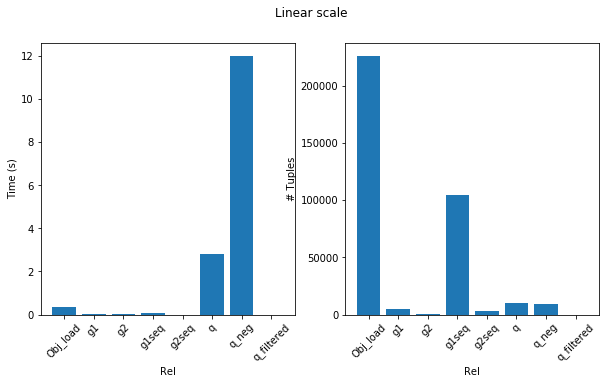

In [46]:
time = {'Obj_load': 0.345, 'g1':0.026, 'g2':0.027, 'g1seq': 0.065, 'g2seq': 0.002, 'q': 2.8, 'q_neg': 12, 'q_filtered': 0.001}
tuples = {'Obj_load': 226000, 'g1': 4470, 'g2': 310, 'g1seq': 104000, 'g2seq': 3400, 'q': 9690, 'q_neg': 9660, 'q_filtered': 30}

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Linear scale')
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Rel", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_x = list(tuples.keys())
tuples_y = list(tuples.values())
axs[1].bar(tuples_x, tuples_y)
axs[1].set(xlabel="Rel", ylabel="# Tuples")
axs[1].tick_params('x', labelrotation=45)

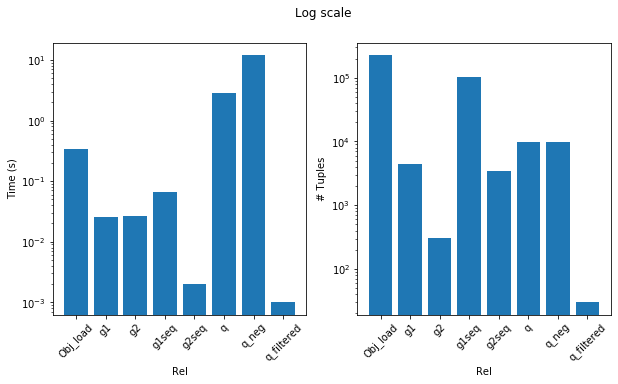

In [47]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Log scale')
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Rel", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)
axs[0].set_yscale('log')

tuples_x = list(tuples.keys())
tuples_y = list(tuples.values())
axs[1].bar(tuples_x, tuples_y)
axs[1].set(xlabel="Rel", ylabel="# Tuples")
axs[1].tick_params('x', labelrotation=45)
axs[1].set_yscale('log')

# Optimizing Q2
make relation g1, g2 or q inline
```
"that will substitute the occurrences of predicate C by the right-hand side of its rules. 
This is also called resolution (but only for one relation). After adding the relational 
qualifier inline, relation C will not physically exist while evaluating the program."
``` 

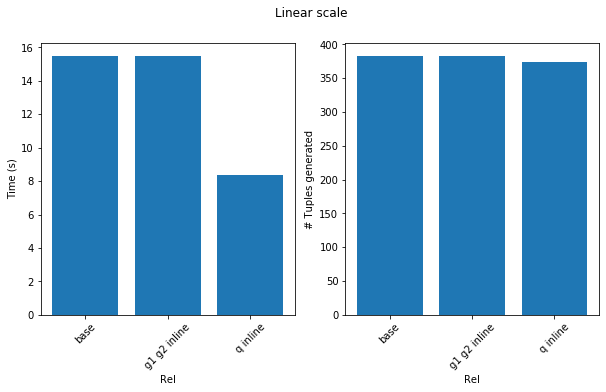

In [48]:
time = {'base': 15.491, 'g1 g2 inline': 15.488, 'q inline': 8.366}
tuples = {'base': 383, 'g1 g2 inline': 383, 'q inline': 374} # (K)

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Linear scale')
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Rel", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_x = list(tuples.keys())
tuples_y = list(tuples.values())
axs[1].bar(tuples_x, tuples_y)
axs[1].set(xlabel="Rel", ylabel="# Tuples generated")
axs[1].tick_params('x', labelrotation=45)

# Multiple jobs
- q inline
- `-j [N]` Vary N 

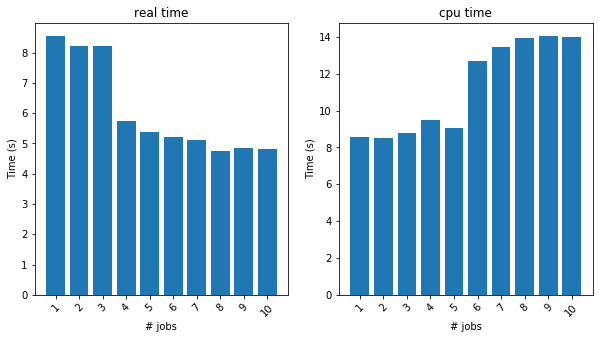

In [51]:
real_time = {'1': 8.552, '2': 8.230, '3': 8.209, '4': 5.747, '5': 5.381, '6': 5.207, '7': 5.115, '8': 4.756, '9': 4.866, '10': 4.817}
cpu_time = {'1': 8.577, '2': 8.511, '3': 8.790, '4': 9.475, '5': 9.071, '6': 12.692, '7': 13.457, '8': 13.947, '9': 14.048, '10': 13.998}

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
real_time_x = list(real_time.keys())
real_time_y = list(real_time.values())
axs[0].bar(real_time_x, real_time_y)
axs[0].set(xlabel="# jobs", ylabel="Time (s)")
axs[0].title.set_text("real time")
axs[0].tick_params('x', labelrotation=45)

cpu_time_x = list(cpu_time.keys())
cpu_time_y = list(cpu_time.values())
axs[1].bar(cpu_time_x, cpu_time_y)
axs[1].set(xlabel="# jobs", ylabel="Time (s)")
axs[1].title.set_text("cpu time")
axs[1].tick_params('x', labelrotation=45)

# Varying Predicate Selectivity
- g1:
```
x1 < 440, x2 > 400, y1 < 360, y2 > 345.
```
- g2:
```
[car at intersection], 400 < x1 < {450, 500, 550, 560}
```
- duration:
```
g1seq_duration > 30
```

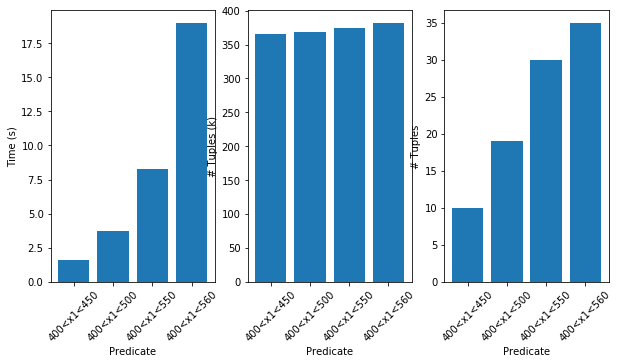

In [63]:
time = {'400<x1<450': 1.57, '400<x1<500': 3.70, '400<x1<550': 8.28, '400<x1<560': 19}
tuples_generated = {'400<x1<450': 365, '400<x1<500': 369, '400<x1<550': 374, '400<x1<560': 382} # (K)
output = {'400<x1<450': 10, '400<x1<500': 19, '400<x1<550': 30, '400<x1<560': 35}

fig, axs = plt.subplots(1, 3, figsize = (10, 5))
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Predicate", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_generated_x = list(tuples_generated.keys())
tuples_generated_y = list(tuples_generated.values())
axs[1].bar(tuples_generated_x, tuples_generated_y)
axs[1].set(xlabel="Predicate", ylabel="# Tuples (k)")
axs[1].tick_params('x', labelrotation=45)

output_x = list(output.keys())
output_y = list(output.values())
axs[2].bar(output_x, output_y)
axs[2].set(xlabel="Predicate", ylabel="# Tuples")
axs[2].tick_params('x', labelrotation=45)

# Varying duration of g1 sequence 
```
g1seq_duration > {30, 25, 20, 15, 10}
g2: [car at intersection], 400 < x1 < 450
```

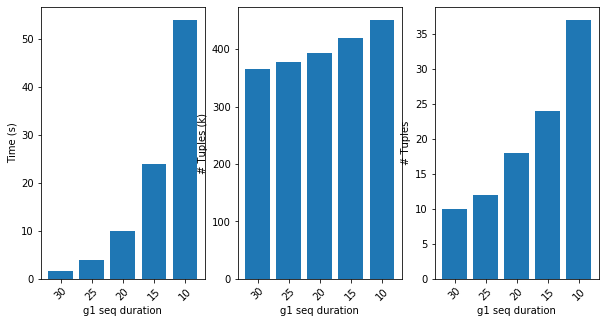

In [65]:
time = {'30': 1.57, '25': 3.95, '20': 10, '15': 24, '10': 54}
tuples_generated = {'30': 365, '25': 377, '20': 394, '15': 419, '10': 451} # (K)
output = {'30': 10, '25': 12, '20': 18, '15': 24, '10': 37}

fig, axs = plt.subplots(1, 3, figsize = (10, 5))
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="g1 seq duration", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_generated_x = list(tuples_generated.keys())
tuples_generated_y = list(tuples_generated.values())
axs[1].bar(tuples_generated_x, tuples_generated_y)
axs[1].set(xlabel="g1 seq duration", ylabel="# Tuples (k)")
axs[1].tick_params('x', labelrotation=45)

output_x = list(output.keys())
output_y = list(output.values())
axs[2].bar(output_x, output_y)
axs[2].set(xlabel="g1 seq duration", ylabel="# Tuples")
axs[2].tick_params('x', labelrotation=45)

# Varying Dataset Size
```
g1seq_duration > 10
g2: [car at intersection], 400 < x1 < 450
```
- Dataset size: {5000:22500:2500} \
- Most time spent on `q_neg`


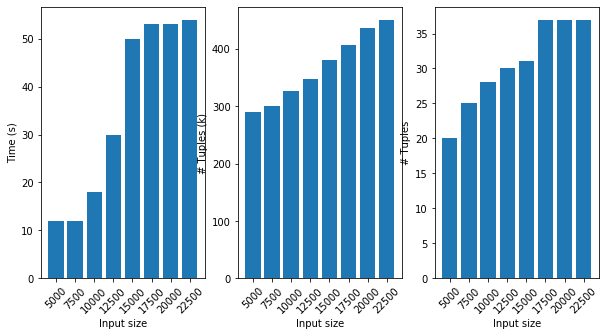

In [68]:
time = {'5000': 12, '7500': 12, '10000': 18, '12500': 30, '15000': 50, '17500': 53, '20000': 53, '22500': 54}
tuples_generated = {'5000': 290, '7500': 301, '10000': 326, '12500': 348, '15000': 380, '17500': 407, '20000': 437, '22500': 451} # (K)
output = {'5000': 20, '7500': 25, '10000': 28, '12500': 30, '15000': 31, '17500': 37, '20000': 37, '22500': 37}

fig, axs = plt.subplots(1, 3, figsize = (10, 5))
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Input size", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_generated_x = list(tuples_generated.keys())
tuples_generated_y = list(tuples_generated.values())
axs[1].bar(tuples_generated_x, tuples_generated_y)
axs[1].set(xlabel="Input size", ylabel="# Tuples (k)")
axs[1].tick_params('x', labelrotation=45)

output_x = list(output.keys())
output_y = list(output.values())
axs[2].bar(output_x, output_y)
axs[2].set(xlabel="Input size", ylabel="# Tuples")
axs[2].tick_params('x', labelrotation=45)

# Window size
```
g1seq_duration > 30
g2: [car at intersection], 400 < x1 < 450
window size = {100, 200, 300}
```
Most time spent on `q_neg`

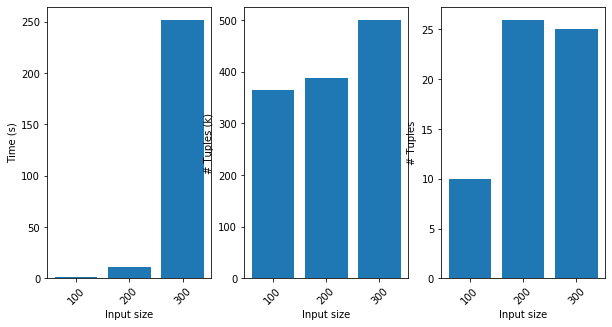

In [69]:
time = {'100': 1.57, '200': 11, '300': 252}
tuples_generated = {'100': 365, '200': 387, '300': 501} # (K)
output = {'100': 10, '200': 26, '300': 25}

fig, axs = plt.subplots(1, 3, figsize = (10, 5))
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="Input size", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_generated_x = list(tuples_generated.keys())
tuples_generated_y = list(tuples_generated.values())
axs[1].bar(tuples_generated_x, tuples_generated_y)
axs[1].set(xlabel="Input size", ylabel="# Tuples (k)")
axs[1].tick_params('x', labelrotation=45)

output_x = list(output.keys())
output_y = list(output.values())
axs[2].bar(output_x, output_y)
axs[2].set(xlabel="Input size", ylabel="# Tuples")
axs[2].tick_params('x', labelrotation=45)

# 9128  9223	9356	9359

# 9157	9223	9356	9356
# 9158	9223	9356	9357
# 9159	9223	9356	9358
# 9160	9223	9356	9359

# q_neg
```
q_neg(fid1,fid2,fid3,fid4) :- 
   g1seq(fid1,fid2),
   g2seq(fid3,fid4),
   (fid4-fid1) < 200,
   fid2 < fid3,
   g1seq(fid1p,fid2p),
   g2seq(fid3p,fid4p),
   (fid4p-fid1p) < 200,
   fid2p < fid3p,
   fid1p <= fid1,
   fid2 <= fid2p,
   fid3p <= fid3,
   fid4 <= fid4p,
   (((fid2p-fid1p)+fid4p)-fid3p) > (((fid2-fid1)+fid4)-fid3).
```
- The size of `g2seq` is 328
- Varying the size of `g1seq`: 
   * Use first {24.7k, 20k, 10k, 9k, 8k, 7k, 6k, 5k, 2k} rows
   * Sample every {2, 3, 4, 5} rows


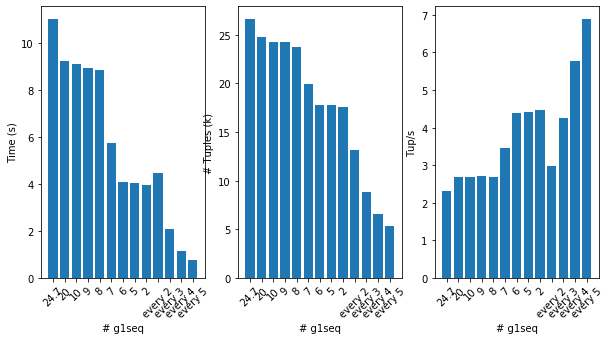

In [80]:
time = {'24.7': 11, '20': 9.24, '10': 9.08, '9': 8.95, '8': 8.85, '7': 5.76, '6': 4.07, '5': 4.05, '2': 3.95, 'every 2': 4.47, 'every 3': 2.07, 'every 4': 1.16, 'every 5': 0.787}
tuples_generated = {'24.7': 26.6, '20': 24.8, '10': 24.3, '9': 24.3, '8': 23.7, '7': 19.9, '6': 17.8, '5': 17.8, '2': 17.6, 'every 2': 13.2, 'every 3': 8.8, 'every 4': 6.64, 'every 5': 5.32} # (K)
tuple_per_second = {'24.7': 2.32, '20': 2.69, '10': 2.68, '9': 2.72, '8': 2.69, '7': 3.47, '6': 4.39, '5': 4.42, '2': 4.47, 'every 2': 2.97, 'every 3': 4.26, 'every 4': 5.76, 'every 5': 6.88}
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
time_x = list(time.keys())
time_y = list(time.values())
axs[0].bar(time_x, time_y)
axs[0].set(xlabel="# g1seq", ylabel="Time (s)")
axs[0].tick_params('x', labelrotation=45)

tuples_generated_x = list(tuples_generated.keys())
tuples_generated_y = list(tuples_generated.values())
axs[1].bar(tuples_generated_x, tuples_generated_y)
axs[1].set(xlabel="# g1seq", ylabel="# Tuples (k)")
axs[1].tick_params('x', labelrotation=45)

tuple_per_second_x = list(tuple_per_second.keys())
tuple_per_second_y = list(tuple_per_second.values())
axs[2].bar(tuple_per_second_x, tuple_per_second_y)
axs[2].set(xlabel="# g1seq", ylabel="Tup/s")
axs[2].tick_params('x', labelrotation=45)

# Alternative ways to filter out non-maximal results
- q2_filter-seq.dl
- q1.2.dl vs. q1.2_filter-seq.dl
    * 140 frames: 19 min vs. 0.43 seconds
    * all frames: N/A vs. 5.67 seconds

# q1.2.sql with iou
- postgres + create view: 10.467s (last time)
- postgres + temporary table: 5.739s
    * g2seq: 2.555s
    * g1seq: 2.527s
    * g2seq_a: 0.251s
    * g1seq_a: 0.092s
- souffle (8 jobs): 14.683s
    * g2seq_a: 6.32s
    * g2seq: 3.68s
    * g1seq: 3.41s
    * g1seq_a: 0.290s

# q1.2.sql without iou
- souffle (8 jobs): 22.255s
    * g1seq: 8.31s
    * g2seq_a: 6.66s
    * g1seq_a: 3.01s
    * g2seq: 2.92s
- postgres: couldn't finish (no space left on device)



# With iou, q1.2.sql, postgresql                                                                        
```
                                                                        QUERY PLAN                                                                        
----------------------------------------------------------------------------------------------------------------------------------------------------------
 HashAggregate  (cost=15066919.31..15067319.31 rows=40000 width=8) (actual time=3182.296..3263.041 rows=370145 loops=1)
   Group Key: person_seq.fid1, person_seq.fid2
   CTE person_seq
     ->  Recursive Union  (cost=0.00..11642445.84 rows=128417755 width=40) (actual time=0.007..2572.169 rows=1132360 loops=1)
           ->  Seq Scan on person  (cost=0.00..509.55 rows=27755 width=40) (actual time=0.006..3.138 rows=27755 loops=1)
           ->  Merge Join  (cost=38236.62..907358.12 rows=12839000 width=40) (actual time=1.548..9.213 rows=4298 loops=257)
                 Merge Cond: (p.fid = ((s.fid2 + 1)))
                 Join Filter: (get_iou(s.x1, s.y1, s.x2, s.y2, p.x1, p.y1, p.x2, p.y2) > '0.5'::double precision)
                 Rows Removed by Join Filter: 7153
                 ->  Index Scan using idx_person on person p  (cost=0.29..1656.61 rows=27755 width=36) (actual time=0.004..2.593 rows=25675 loops=257)
                 ->  Materialize  (cost=38236.33..39624.08 rows=277550 width=40) (actual time=1.181..2.209 rows=11485 loops=257)
                       ->  Sort  (cost=38236.33..38930.21 rows=277550 width=40) (actual time=1.179..1.383 rows=4406 loops=257)
                             Sort Key: ((s.fid2 + 1))
                             Sort Method: quicksort  Memory: 25kB
                             ->  WorkTable Scan on person_seq s  (cost=0.00..5551.00 rows=277550 width=40) (actual time=0.000..0.614 rows=4406 loops=257)
   ->  CTE Scan on person_seq  (cost=0.00..3210443.88 rows=42805918 width=8) (actual time=1080.804..3010.995 rows=558347 loops=1)
         Filter: ((fid2 - fid1) > 30)
         Rows Removed by Filter: 574013
 Planning time: 0.243 ms
 Execution time: 3360.944 ms
```
# Without iou, q1.2.sql, postgresql  
``` 
                                                QUERY PLAN                                                 
-----------------------------------------------------------------------------------------------------------
 HashAggregate  (cost=25086196.39..25086596.39 rows=40000 width=8)
   Group Key: person_seq.fid1, person_seq.fid2
   CTE person_seq
     ->  Recursive Union  (cost=0.00..14814255.99 rows=385197765 width=8)
           ->  Seq Scan on person  (cost=0.00..509.55 rows=27755 width=8)
           ->  Merge Join  (cost=34442.62..710979.11 rows=38517001 width=8)
                 Merge Cond: (p.fid = ((s.fid2 + 1)))
                 ->  Index Only Scan using idx_person on person p  (cost=0.29..1656.61 rows=27755 width=4)
                 ->  Materialize  (cost=34442.33..35830.08 rows=277550 width=8)
                       ->  Sort  (cost=34442.33..35136.21 rows=277550 width=8)
                             Sort Key: ((s.fid2 + 1))
                             ->  WorkTable Scan on person_seq s  (cost=0.00..5551.00 rows=277550 width=8)
   ->  CTE Scan on person_seq  (cost=0.00..9629944.12 rows=128399255 width=8)
         Filter: ((fid2 - fid1) > 30)   
```

# bdd, q1, postgres: 
- person trajectory (> 30 frames), followed by car trajectory (> 30), window size < 100.
```
DROP FUNCTION
Time: 1.548 ms
DROP INDEX
Time: 5.969 ms
CREATE INDEX
Time: 724.240 ms
CREATE FUNCTION
Time: 1.283 ms
SELECT 174593
Time: 209.285 ms
SELECT 1153111
Time: 596.161 ms
CREATE INDEX
Time: 53.848 ms
CREATE INDEX
Time: 381.433 ms
SELECT 851772
Time: 17762.156 ms (00:17.762) --> person_seq
SELECT 7709
Time: 241.726 ms
SELECT 213
Time: 3.087 ms
SELECT 213
Time: 727.399 ms
CREATE INDEX
Time: 1.277 ms
SELECT 37084431
Time: 402665.598 ms (06:42.666) --> car_seq
CREATE INDEX
Time: 15081.102 ms (00:15.081) --> car_seq_a
SELECT 102042
Time: 8831.243 ms (00:08.831) --> car_seq_b
SELECT 1304
Time: 24.662 ms
CREATE INDEX
Time: 1.547 ms
SELECT 1316
Time: 15.163 ms
CREATE INDEX
Time: 1.624 ms
SELECT 181
Time: 4.294 ms
COPY 181
Time: 2.973 ms
```

# bdd, q2, postgres:
- car trajectory (> 30), starting from left, ending with right.
```
DROP FUNCTION
Time: 0.962 ms
DROP INDEX
Time: 5.807 ms
CREATE INDEX
Time: 713.876 ms
CREATE FUNCTION
Time: 1.192 ms
SELECT 1153111
Time: 552.183 ms
CREATE INDEX
Time: 371.640 ms
SELECT 37084431
Time: 380110.509 ms (06:20.111) --> car_seq
SELECT 102042
Time: 9351.722 ms (00:09.352) --> car_seq_a
SELECT 1304
Time: 34.394 ms
SELECT 1316
Time: 34099.305 ms (00:34.099) --> car_filtered
SELECT 32
Time: 10.496 ms
COPY 32
Time: 0.522 ms
```